# Animated Visualization of Sequential Images

This notebook demonstrates how to:
1. **Read and display** a series of image frames (e.g., `.png` or `.jpg` files) from a local directory.  
2. **Arrange** them in a grid layout for quick visual inspection.  
3. **Create an animated GIF** from the ordered frames using `imageio`.  
4. **Display the generated GIF** directly within the notebook.

---

## Input

- Folder containing a series of sequentially numbered images, e.g.: frame_1.png, frame_2.png, frame_3.png, ..., frame_12.png
- You can easily modify the directory path (`img_dir`) and frame rate (`fps`) in the code to suit your needs.

---

## Requirements

Make sure these libraries are installed in your environment:

```bash
pip install imageio matplotlib pillow

# Example -1-

Total images found: 12


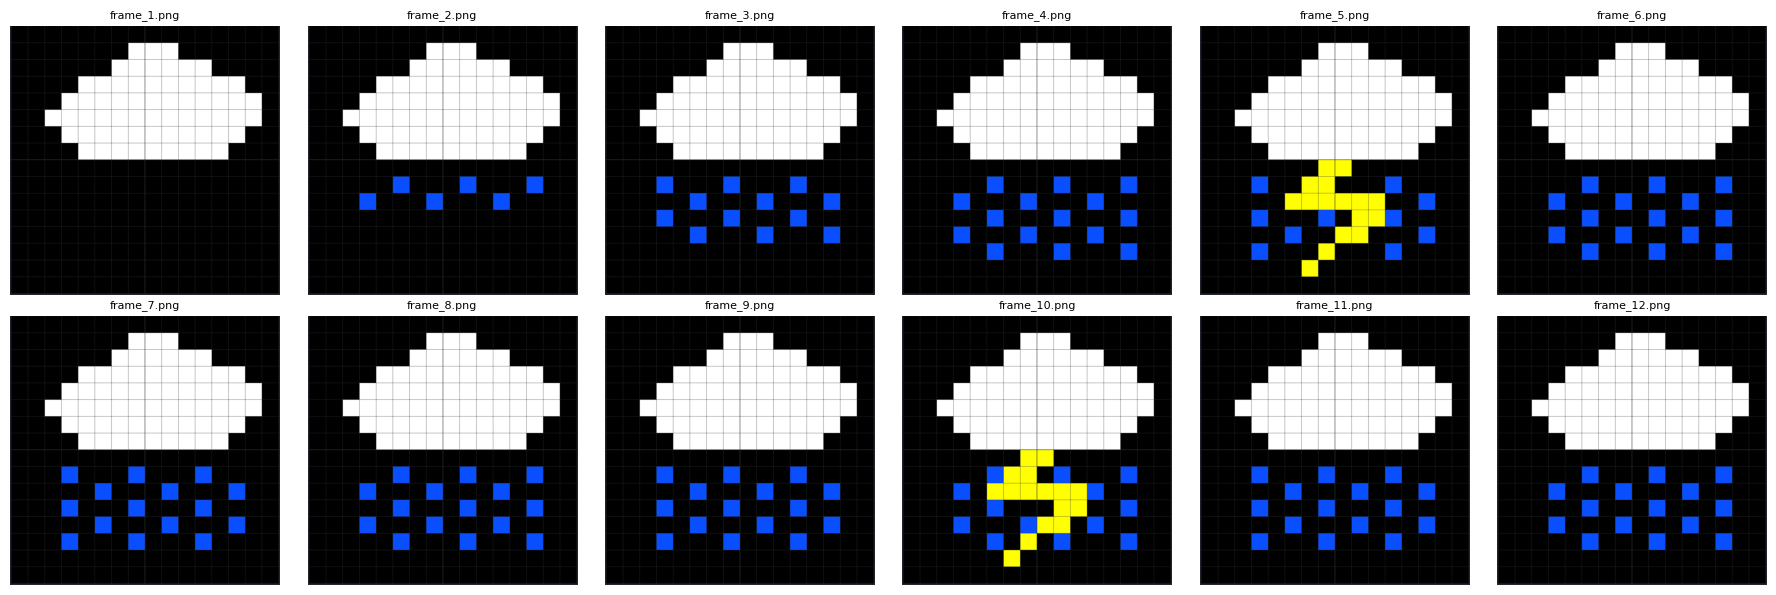

GIF created: animation.gif


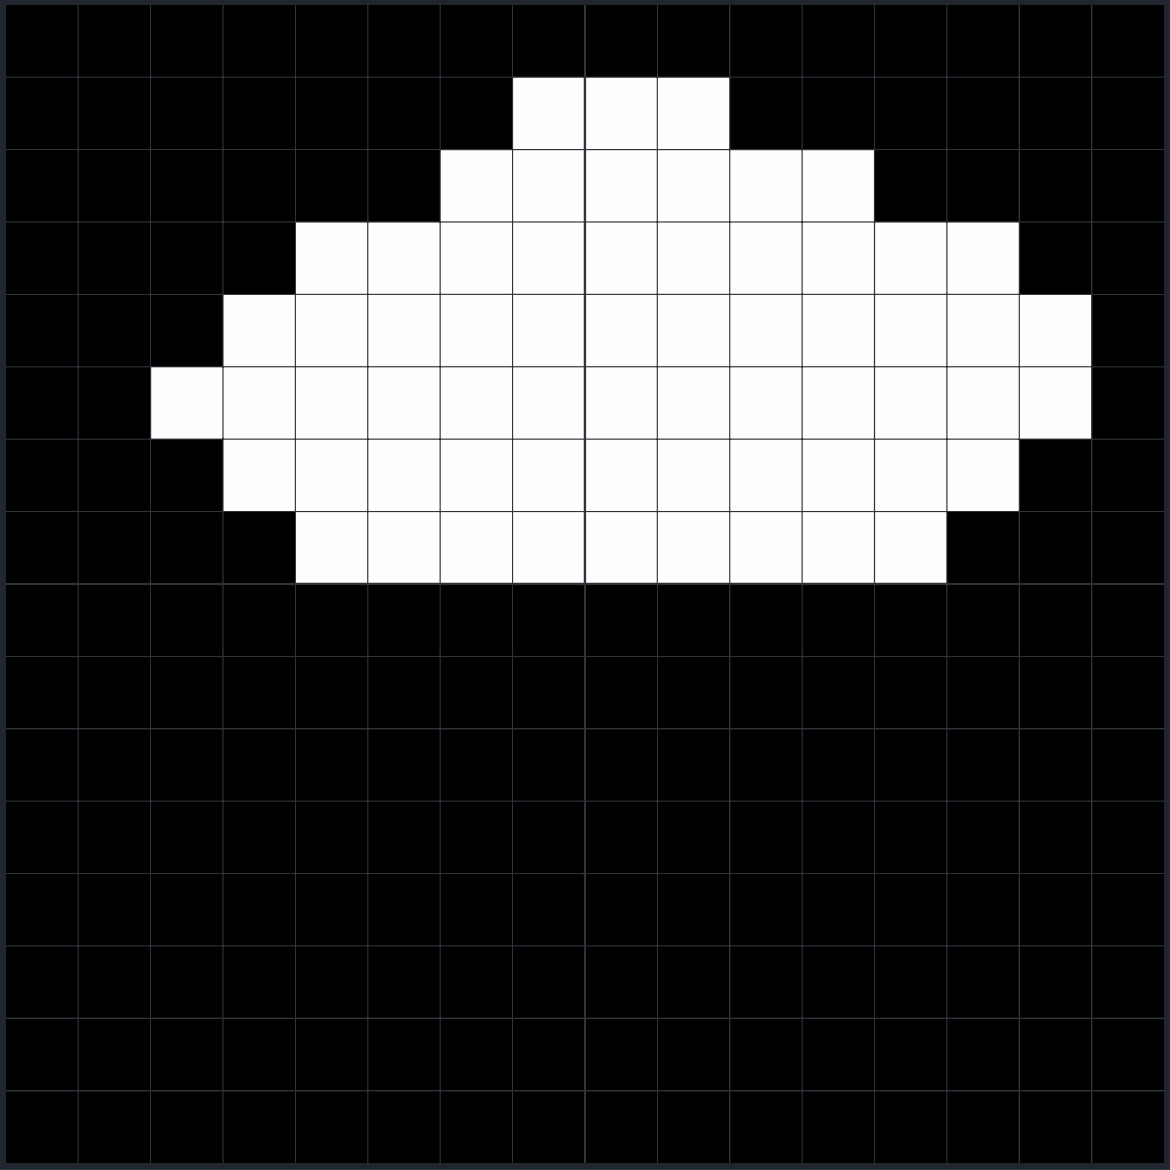

In [7]:
import os
import re
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from IPython.display import Image as IPyImage, display

# --- Paths ---
img_dir = "/Users/cansu/Desktop/Reseach/Notebooks/images"
out_gif = "animation.gif"

# --- Natural sorting function (so 1 < 2 < ... < 10 < 11 < 12) ---
def natural_key(s):
    # Split filename into text and number parts, e.g. ['frame_', '12', '.png']
    return [int(t) if t.isdigit() else t.lower() for t in re.split(r'(\d+)', s)]

# --- Collect and sort all image files (.png /.jpg / .jpeg) ---
files = sorted(
    [f for f in os.listdir(img_dir) if f.lower().endswith((".png"))],
    key=natural_key
)

print(f"Total images found: {len(files)}")

# --- 1) Display the first 12 images in two rows (1–6 top row, 7–12 bottom row) ---
n_show = min(12, len(files))
to_show = files[:n_show]

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 6))

for idx, fname in enumerate(to_show):
    row = 0 if idx < 6 else 1
    col = idx if idx < 6 else idx - 6

    ax = axes[row, col]
    img = imageio.imread(os.path.join(img_dir, fname))
    ax.imshow(img)
    ax.set_title(fname, fontsize=8)
    ax.axis("off")

# Turn off unused subplots (in case there are fewer than 12 images)
for r in range(2):
    for c in range(6):
        i = r * 6 + c
        if i >= n_show:
            axes[r, c].axis("off")

plt.tight_layout()
plt.show()

# --- 2) Create a GIF using all images in the folder ---
frames = [imageio.imread(os.path.join(img_dir, f)) for f in files]
imageio.mimsave(out_gif, frames, fps=3, loop=0)
print("GIF created:", out_gif)

# --- 3) Display the resulting GIF directly in the notebook (scaled smaller) ---
display(IPyImage(filename=out_gif, width=400))  # adjust width to control on-screen size


# Example -2-

Total images found: 7632


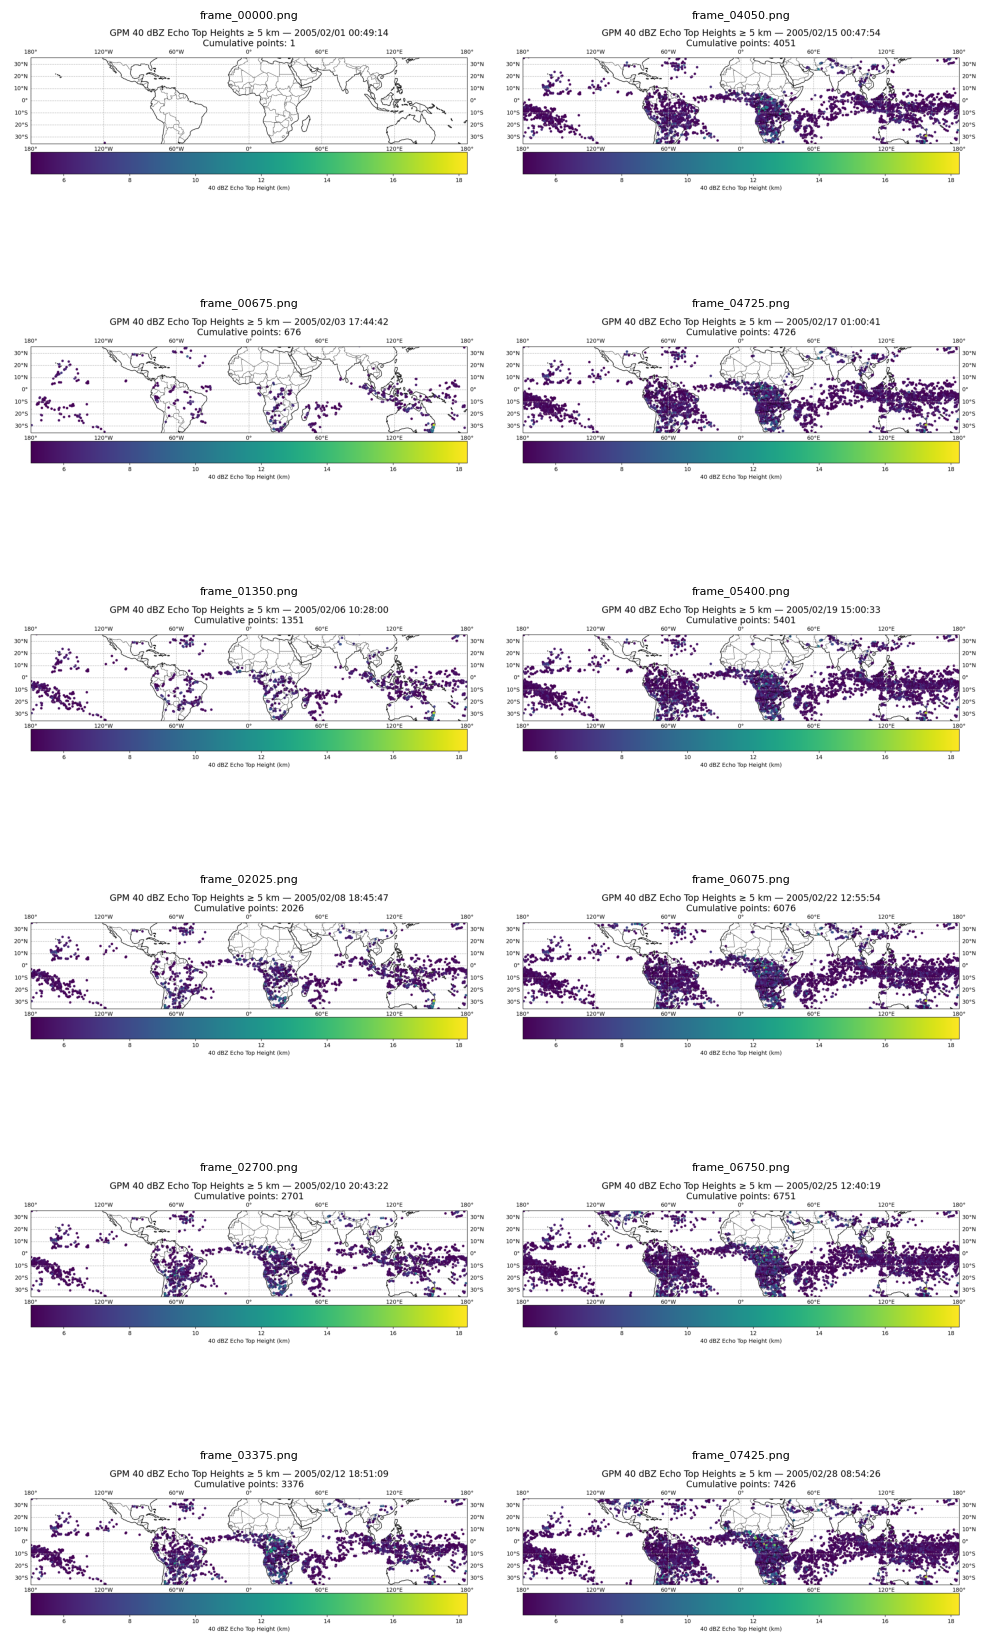

GIF created: animation_2.gif


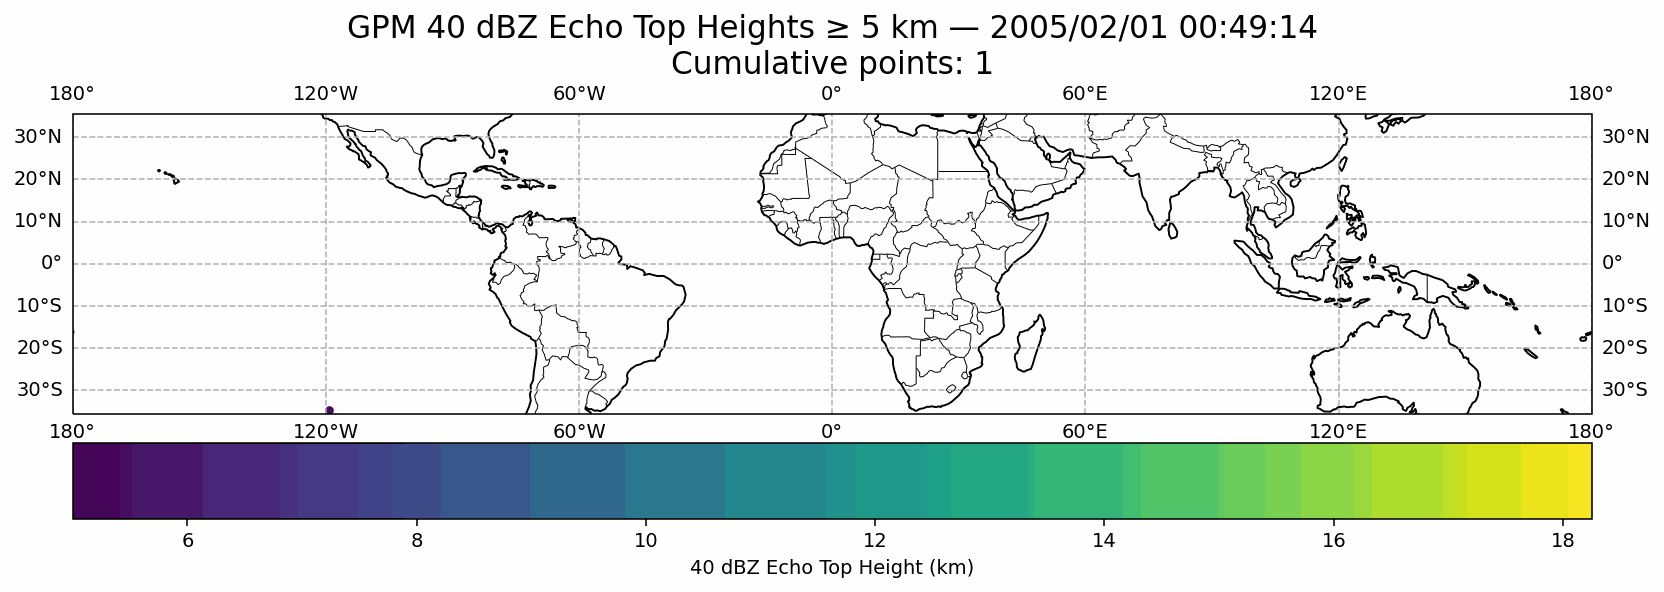

In [1]:
import os
import re
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from IPython.display import Image as IPyImage, display

# --- Paths ---
img_dir = "/Users/cansu/Desktop/Reseach/Notebooks/frames_gpm_cumulative"
out_gif = "animation_2.gif"

# --- Natural sorting function (so 1 < 2 < ... < 10 < 11 < 12) ---
def natural_key(s):
    # Split filename into text and number parts, e.g. ['frame_', '12', '.png']
    return [int(t) if t.isdigit() else t.lower() for t in re.split(r'(\d+)', s)]

# --- Collect and sort all image files (.png /.jpg / .jpeg) ---
files = sorted(
    [f for f in os.listdir(img_dir) if f.lower().endswith((".png"))],
    key=natural_key
)

print(f"Total images found: {len(files)}")

# --- 1) Display images in each 500 step in six rows, two columns (vertical layout) ---
n_step = 675
to_show = files[::n_step]

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 18))  # swapped shape

for idx, fname in enumerate(to_show):
    row = idx if idx < 6 else idx - 6
    col = 0 if idx < 6 else 1

    if row >= 6:  # safety check for fewer images
        break

    ax = axes[row, col]
    img = imageio.imread(os.path.join(img_dir, fname))
    ax.imshow(img)
    ax.set_title(fname, fontsize=8)
    ax.axis("off")

# Turn off unused subplots
n_show = len(to_show)
for r in range(6):
    for c in range(2):
        i = r + c * 6
        if i >= n_show:
            axes[r, c].axis("off")

plt.tight_layout()
plt.show()


# --- 2) Create a GIF using all images in the folder ---
frames = [imageio.imread(os.path.join(img_dir, f)) for f in files]
imageio.mimsave(out_gif, frames[::50], fps=3, loop=0)
print("GIF created:", out_gif)

# --- 3) Display the resulting GIF directly in the notebook (scaled smaller) ---
display(IPyImage(filename=out_gif))  # adjust width to control on-screen size